# Rf 6 0 8_Fitresultaspdf
Likelihood and minimization: representing the parabolic approximation of the fit as a multi-variate Gaussian on the
parameters of the fitted p.d.f.



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:59 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooConstVar.h"
#include "RooAddPdf.h"
#include "RooChebychev.h"
#include "RooFitResult.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"
#include "TFile.h"
#include "TStyle.h"
#include "TH2.h"
#include "TH3.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Create model and dataset
 -----------------------------------------------

Observable

In [3]:
RooRealVar x("x", "x", -20, 20);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Model (intentional strong correlations)

In [4]:
RooRealVar mean("mean", "mean of g1 and g2", 0, -1, 1);
RooRealVar sigma_g1("sigma_g1", "width of g1", 2);
RooGaussian g1("g1", "g1", x, mean, sigma_g1);

RooRealVar sigma_g2("sigma_g2", "width of g2", 4, 3.0, 5.0);
RooGaussian g2("g2", "g2", x, mean, sigma_g2);

RooRealVar frac("frac", "frac", 0.5, 0.0, 1.0);
RooAddPdf model("model", "model", RooArgList(g1, g2), frac);

Generate 1000 events

In [5]:
RooDataSet *data = model.generate(x, 1000);

Fit model to data
 ----------------------------------

In [6]:
RooFitResult *r = model.fitTo(*data, Save());

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (g1,g2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean         0.00000e+00  2.00000e-01   -1.00000e+00  1.00000e+00
     3 sigma_g2     4.00000e+00  2.00000e-01    3.00000e+00  5.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGEN

Createmv gaussian pdf of fitted  parameters
 ------------------------------------------------------------------------------------

In [7]:
RooAbsPdf *parabPdf = r->createHessePdf(RooArgSet(frac, mean, sigma_g2));

Some execercises with the parameter pdf
 -----------------------------------------------------------------------------

Generate 100k points in the parameter space, sampled from the mvgaussian p.d.f.

In [8]:
RooDataSet *d = parabPdf->generate(RooArgSet(mean, sigma_g2, frac), 100000);

Sample a 3-d histogram of the p.d.f. to be visualized as an error ellipsoid using the gliso draw option

In [9]:
TH3 *hh_3d = (TH3 *)parabPdf->createHistogram("mean,sigma_g2,frac", 25, 25, 25);
hh_3d->SetFillColor(kBlue);

Project 3d parameter p.d.f. down to 3 permutations of two-dimensional p.d.f.s
 The integrations corresponding to these projections are performed analytically
 by the MV Gaussian p.d.f.

In [10]:
RooAbsPdf *pdf_sigmag2_frac = parabPdf->createProjection(mean);
RooAbsPdf *pdf_mean_frac = parabPdf->createProjection(sigma_g2);
RooAbsPdf *pdf_mean_sigmag2 = parabPdf->createProjection(frac);

Make 2d plots of the 3 two-dimensional p.d.f. projections

In [11]:
TH2 *hh_sigmag2_frac = (TH2 *)pdf_sigmag2_frac->createHistogram("sigma_g2,frac", 50, 50);
TH2 *hh_mean_frac = (TH2 *)pdf_mean_frac->createHistogram("mean,frac", 50, 50);
TH2 *hh_mean_sigmag2 = (TH2 *)pdf_mean_sigmag2->createHistogram("mean,sigma_g2", 50, 50);
hh_mean_frac->SetLineColor(kBlue);
hh_sigmag2_frac->SetLineColor(kBlue);
hh_mean_sigmag2->SetLineColor(kBlue);

Draw the 'sigar'

In [12]:
new TCanvas("rf608_fitresultaspdf_1", "rf608_fitresultaspdf_1", 600, 600);
hh_3d->Draw("iso");

Draw the 2d projections of the 3d p.d.f.

In [13]:
TCanvas *c2 = new TCanvas("rf608_fitresultaspdf_2", "rf608_fitresultaspdf_2", 900, 600);
c2->Divide(3, 2);
c2->cd(1);
gPad->SetLeftMargin(0.15);
hh_mean_sigmag2->GetZaxis()->SetTitleOffset(1.4);
hh_mean_sigmag2->Draw("surf3");
c2->cd(2);
gPad->SetLeftMargin(0.15);
hh_sigmag2_frac->GetZaxis()->SetTitleOffset(1.4);
hh_sigmag2_frac->Draw("surf3");
c2->cd(3);
gPad->SetLeftMargin(0.15);
hh_mean_frac->GetZaxis()->SetTitleOffset(1.4);
hh_mean_frac->Draw("surf3");

Draw the distributions of parameter points sampled from the p.d.f.

In [14]:
TH1 *tmp1 = d->createHistogram("mean,sigma_g2", 50, 50);
TH1 *tmp2 = d->createHistogram("sigma_g2,frac", 50, 50);
TH1 *tmp3 = d->createHistogram("mean,frac", 50, 50);

c2->cd(4);
gPad->SetLeftMargin(0.15);
tmp1->GetZaxis()->SetTitleOffset(1.4);
tmp1->Draw("lego3");
c2->cd(5);
gPad->SetLeftMargin(0.15);
tmp2->GetZaxis()->SetTitleOffset(1.4);
tmp2->Draw("lego3");
c2->cd(6);
gPad->SetLeftMargin(0.15);
tmp3->GetZaxis()->SetTitleOffset(1.4);
tmp3->Draw("lego3");

Draw all canvases 

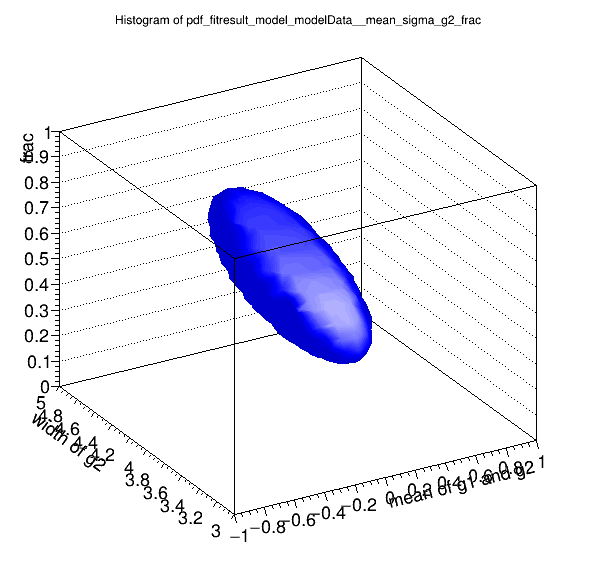

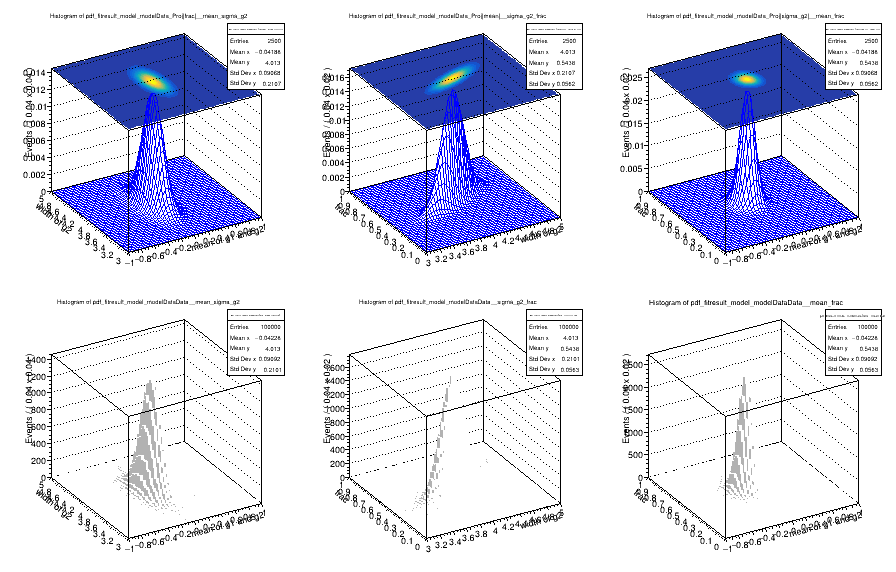

In [15]:
gROOT->GetListOfCanvases()->Draw()